In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape  

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(train_labels)

60000

In [11]:
len(test_labels)

10000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

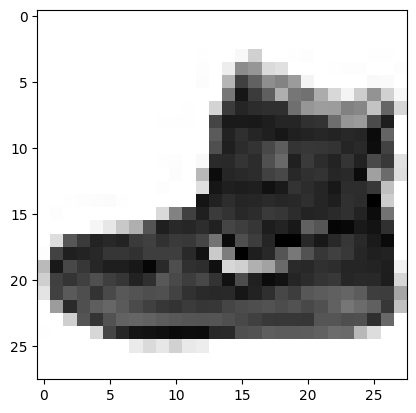

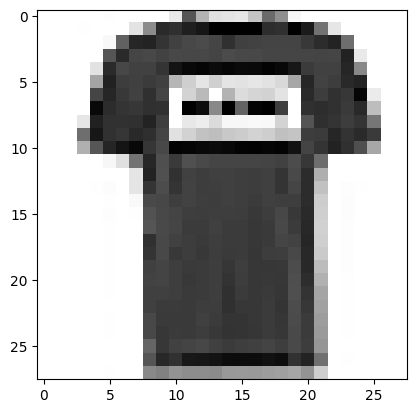

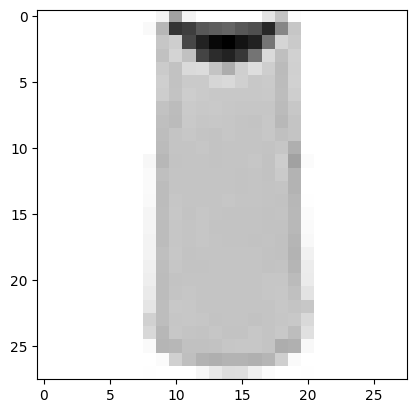

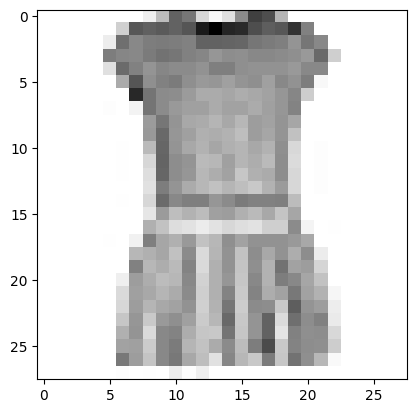

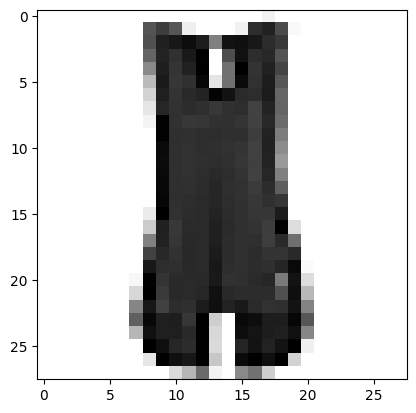

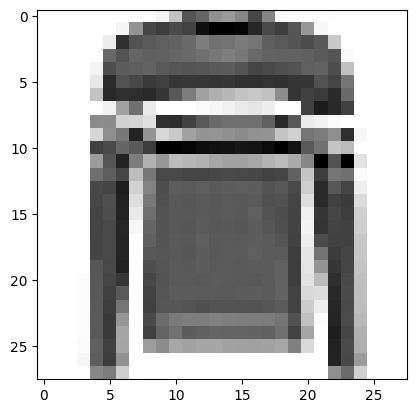

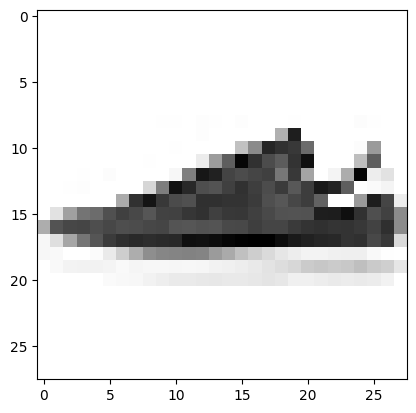

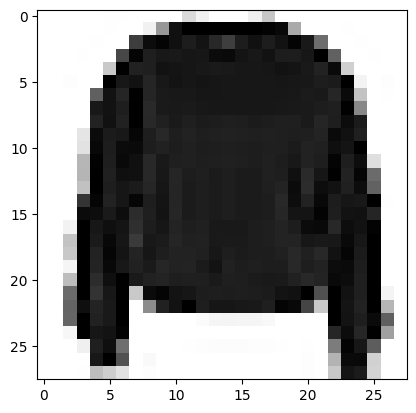

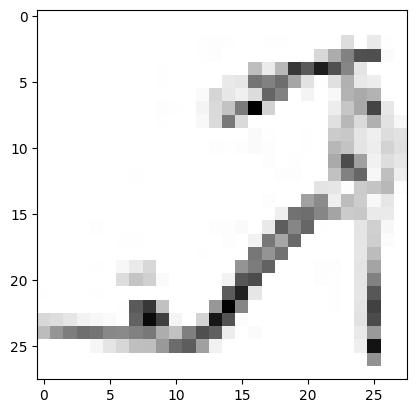

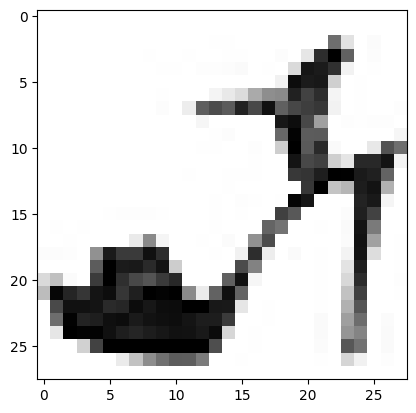

In [13]:
for i in range(10):
    plt.imshow(train_images[i], cmap="Greys")
    plt.show()

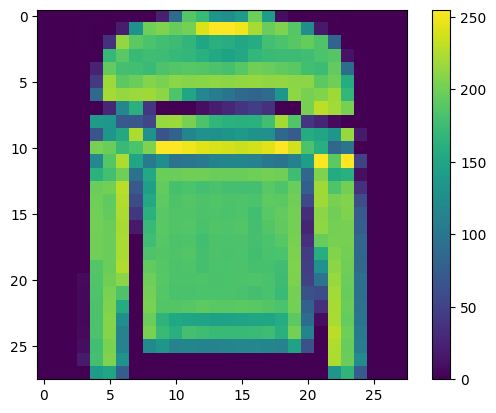

In [14]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)     
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

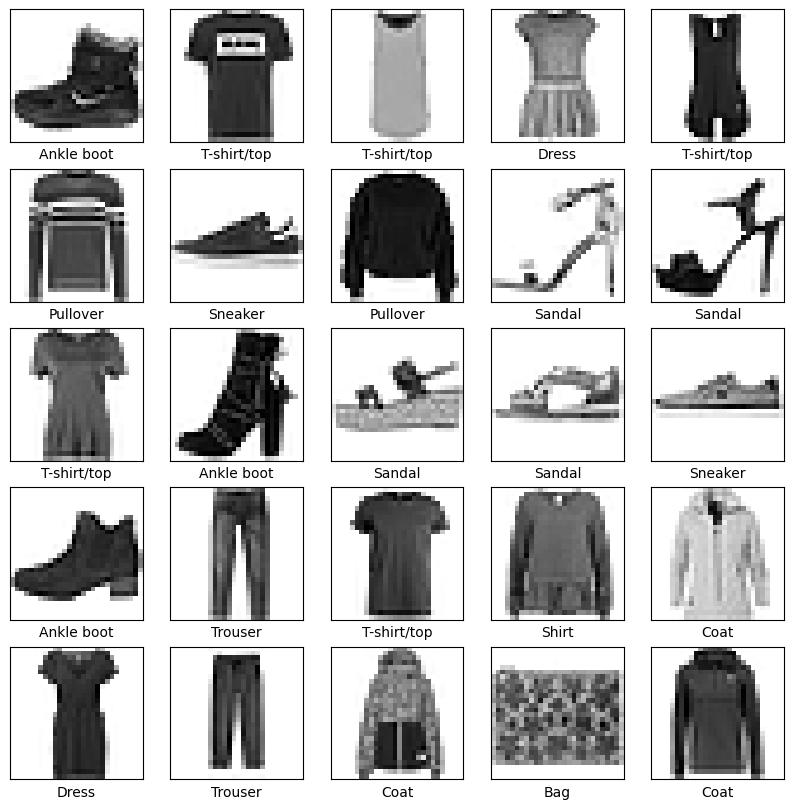

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 2s 735us/step - loss: 0.5000 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 1s 706us/step - loss: 0.3733 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.3369 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.3142 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 1s 716us/step - loss: 0.2969 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.2813 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 1s 720us/step - loss: 0.2697 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 1s 718us/step - loss: 0.2593 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.2492 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 1s 71

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3295 - accuracy: 0.8829 - 234ms/epoch - 748us/step

Test accuracy: 0.8828999996185303


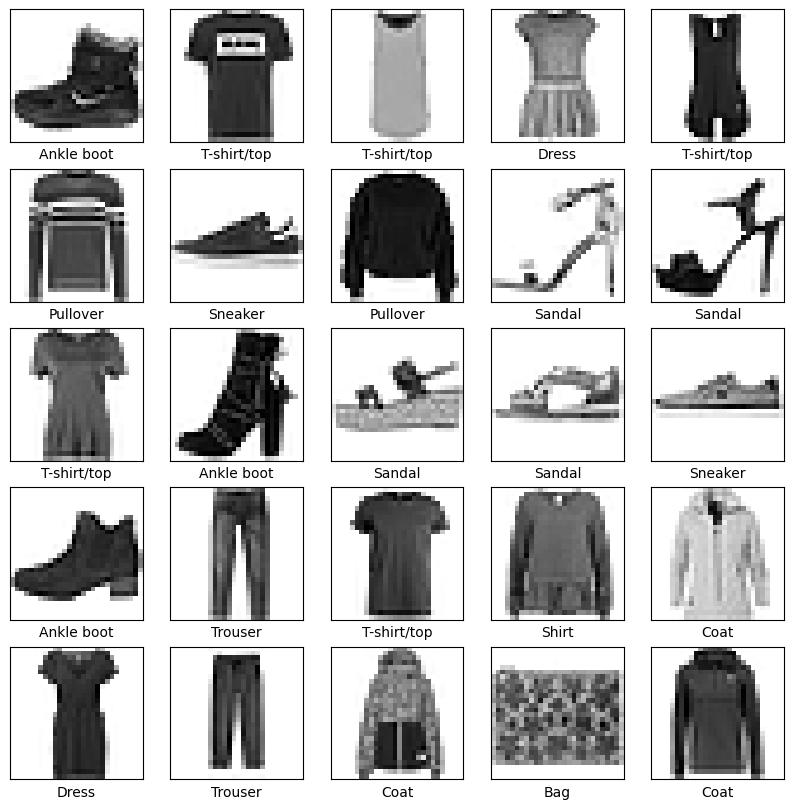

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 513us/step


In [26]:
predictions[0]

array([2.9645710e-08, 1.0730222e-09, 1.3653505e-10, 8.2972969e-12,
       9.4086507e-09, 1.1376003e-04, 1.6129204e-07, 2.0639917e-03,
       1.4237663e-07, 9.9782193e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [38]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

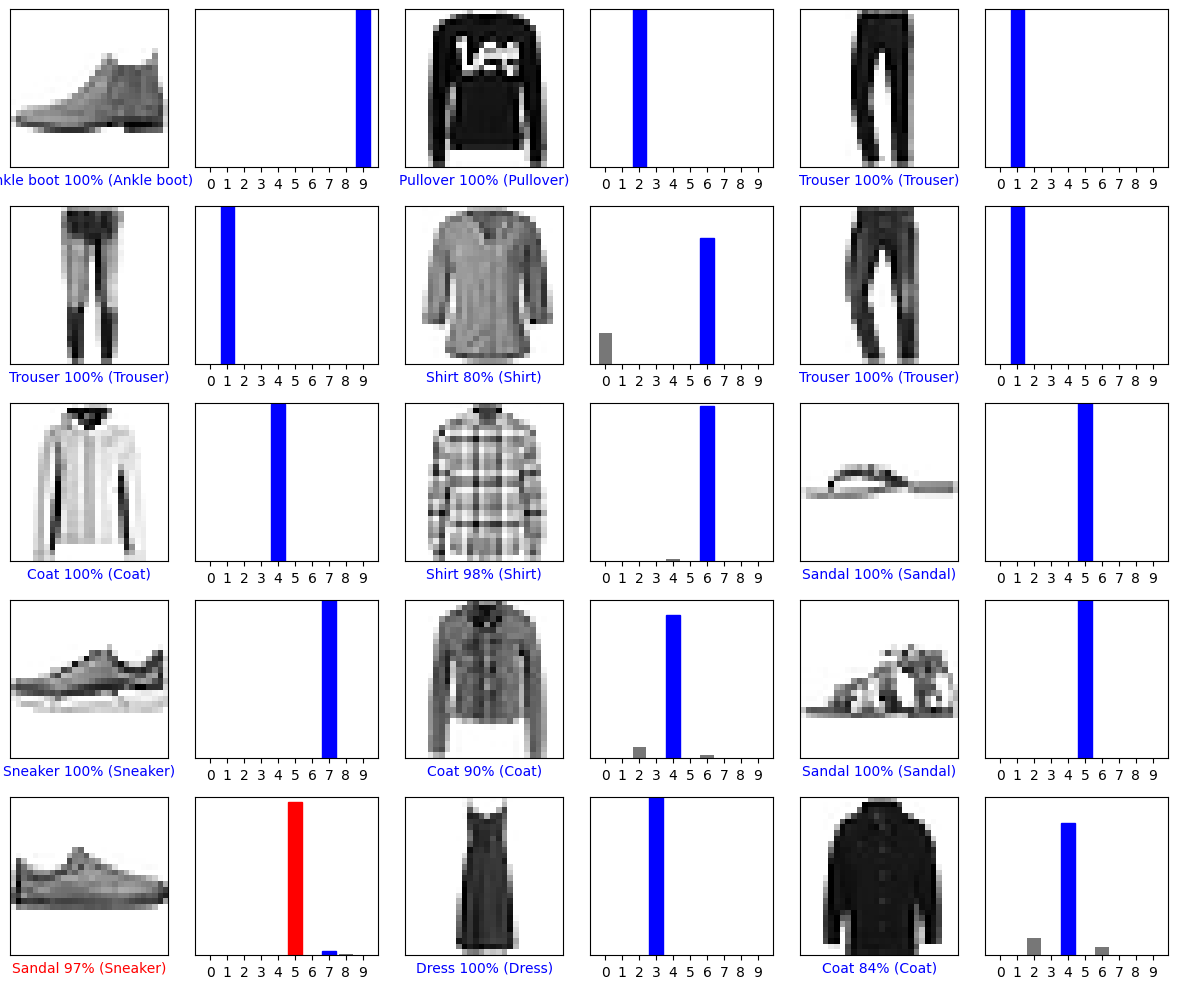

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()